# Import Library

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer


In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing Data

In [175]:
X = pd.read_excel (r'/content/drive/MyDrive/iptik_2020.xlsx')
X
#Keterangan Variabel
#X1 : Subindeks Akses dan Infrastruktur Tahun 2019
#X2 : Subindeks Penggunaan Tahun 2019
#X3 : Subindeks Keahlian Tahun 2019
#X4 : Subindeks Akses dan Infrastruktur Tahun 2020
#X5 : Subindeks Penggunaan Tahun 2020
#X6 : Subindeks Keahlian Tahun 2020

,Provinsi,X1,X2,X3,X4,X5,X6
0,ACEH,5.39,3.53,6.71,5.54,4.25,6.76
1,SUMATERA UTARA,5.66,4.19,6.24,5.72,4.72,6.31
2,SUMATERA BARAT,5.82,4.10,6.41,5.98,4.57,6.50
3,RIAU,5.81,4.44,6.15,5.99,5.23,6.24
4,JAMBI,5.74,4.29,5.80,5.86,4.93,5.89
5,SUMATERA SELATAN,5.66,3.83,5.55,5.82,4.62,5.63
6,BENGKULU,5.75,4.12,6.29,5.99,4.58,6.37
7,LAMPUNG,5.32,4.00,5.52,5.55,4.52,5.61
8,KEP. BANGKA BELITUNG,5.89,4.64,5.19,5.97,5.25,5.28
9,KEP. RIAU,6.97,5.88,6.08,6.90,6.16,6.17


In [138]:
round(X.iloc[:,1:7].describe(include='all'),2)

,X1,X2,X3,X4,X5,X6
count,34.00,34.00,34.00,34.00,34.00,34.00
mean,5.82,4.40,6.01,5.97,4.89,6.09
std,0.83,1.00,0.54,0.82,0.93,0.54
min,3.65,2.17,4.79,3.68,2.23,4.91
25%,5.40,3.87,5.62,5.56,4.52,5.68
50%,5.70,4.32,6.09,5.90,4.92,6.16
75%,6.02,5.03,6.38,6.07,5.37,6.47
max,8.03,6.89,7.49,8.16,7.19,7.57


In [139]:
X_use = X.iloc[:,1:7]
label = X.iloc[:,0]
label.unique()
label = ['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
       'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG',
       'KEP. RIAU', 'DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH',
       'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI',
       'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT',
       'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR',
       'KALIMANTAN UTARA', 'SULAWESI UTARA', 'SULAWESI TENGAH',
       'SULAWESI SELATAN', 'SULAWESI TENGGARA', 'GORONTALO',
       'SULAWESI BARAT', 'MALUKU', 'MALUKU UTARA', 'PAPUA BARAT','PAPUA']

## Detect Outliers

In [140]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[6.97, 8.03, 7.86, 6.97, 3.65]

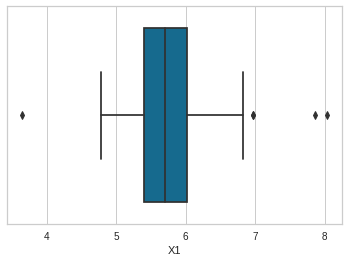

In [141]:
# Box Plot
sns.boxplot(X['X1'])
detect_outlier(X['X1'])


In [142]:
X.query("X1 == 6.97 or X1 == 8.03 or X1 == 7.86 or X1 == 3.65")

,Provinsi,X1,X2,X3,X4,X5,X6
9,KEP. RIAU,6.97,5.88,6.08,6.90,6.16,6.17
10,DKI JAKARTA,8.03,6.89,6.53,8.16,7.19,6.59
13,DI YOGYAKARTA,7.86,5.65,7.49,8.02,5.91,7.57
16,BALI,6.97,5.49,6.26,7.48,5.77,6.36
33,PAPUA,3.65,2.17,4.79,3.68,2.23,4.91


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[6.89]

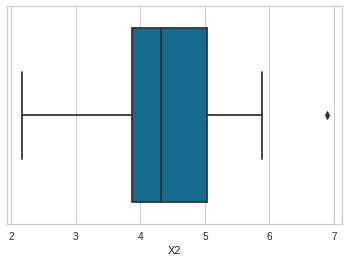

In [143]:
sns.boxplot(X['X2'])
detect_outlier(X['X2'])

In [144]:
X.query("X2 == 6.89")

,Provinsi,X1,X2,X3,X4,X5,X6
10,DKI JAKARTA,8.03,6.89,6.53,8.16,7.19,6.59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

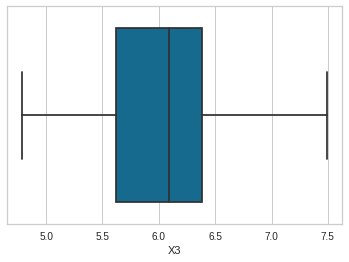

In [145]:
sns.boxplot(X['X3'])
detect_outlier(X['X3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[6.9, 8.16, 8.02, 7.48, 3.68]

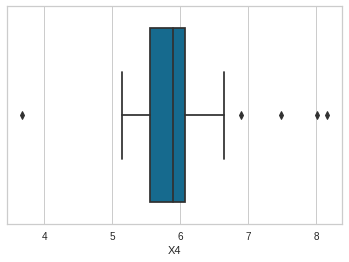

In [146]:
sns.boxplot(X['X4'])
detect_outlier(X['X4'])

In [147]:
X.query("X4 == 6.9 or X4 == 8.16 or X4 == 8.02 or X4 == 7.48 or X4 == 3.68")

,Provinsi,X1,X2,X3,X4,X5,X6
9,KEP. RIAU,6.97,5.88,6.08,6.90,6.16,6.17
10,DKI JAKARTA,8.03,6.89,6.53,8.16,7.19,6.59
13,DI YOGYAKARTA,7.86,5.65,7.49,8.02,5.91,7.57
16,BALI,6.97,5.49,6.26,7.48,5.77,6.36
33,PAPUA,3.65,2.17,4.79,3.68,2.23,4.91


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[7.19, 3.19, 2.23]

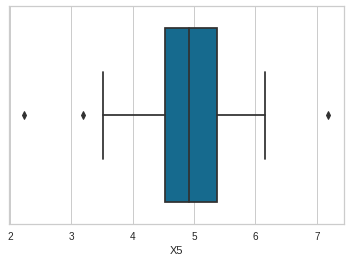

In [148]:
sns.boxplot(X['X5'])
detect_outlier(X['X5'])

In [149]:
X.query("X5 == 7.19 or X5 == 3.19 or X5 == 2.23")

,Provinsi,X1,X2,X3,X4,X5,X6
10,DKI JAKARTA,8.03,6.89,6.53,8.16,7.19,6.59
18,NUSA TENGGARA TIMUR,4.93,2.56,5.65,5.15,3.19,5.75
33,PAPUA,3.65,2.17,4.79,3.68,2.23,4.91


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

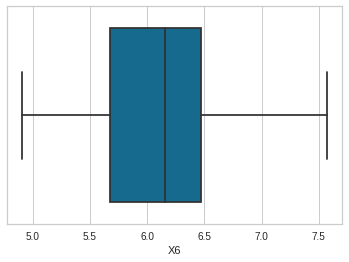

In [150]:
sns.boxplot(X['X6'])
detect_outlier(X['X6'])

## Multicollinearity Test

In [151]:
X_use

,X1,X2,X3,X4,X5,X6
0,5.39,3.53,6.71,5.54,4.25,6.76
1,5.66,4.19,6.24,5.72,4.72,6.31
2,5.82,4.10,6.41,5.98,4.57,6.50
3,5.81,4.44,6.15,5.99,5.23,6.24
4,5.74,4.29,5.80,5.86,4.93,5.89
5,5.66,3.83,5.55,5.82,4.62,5.63
6,5.75,4.12,6.29,5.99,4.58,6.37
7,5.32,4.00,5.52,5.55,4.52,5.61
8,5.89,4.64,5.19,5.97,5.25,5.28
9,6.97,5.88,6.08,6.90,6.16,6.17


In [152]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Variabel"] = X_use.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_use.values, i)
                          for i in range(len(X_use.columns))]
  
vif_data

,Variabel,VIF
0,X1,2744.578229
1,X2,559.076624
2,X3,65651.181380
3,X4,2213.725833
4,X5,789.815220
5,X6,66332.643000


In [153]:
!pip install factor_analyzer

In [154]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X_use)
chi_square_value, p_value

(475.0832813083473, 1.0450784476739053e-91)

## KMO Test

In [155]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X_use)

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [156]:
round(kmo_model,3)

0.706

## Feature Scaling (using Robust Scaler)

In [157]:
sc = RobustScaler()
scaler = sc.fit(X_use)
X_scaled = scaler.transform(X_use)

# Converting the numpy array into a pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_use.columns)
X_scaled

,X1,X2,X3,X4,X5,X6
0,-0.506024,-0.682505,0.815789,-0.699507,-0.784661,0.757098
1,-0.072289,-0.112311,0.197368,-0.344828,-0.230088,0.189274
2,0.184739,-0.190065,0.421053,0.167488,-0.407080,0.429022
3,0.168675,0.103672,0.078947,0.187192,0.371681,0.100946
4,0.056225,-0.025918,-0.381579,-0.068966,0.017699,-0.340694
5,-0.072289,-0.423326,-0.710526,-0.147783,-0.348083,-0.668770
6,0.072289,-0.172786,0.263158,0.187192,-0.395280,0.264984
7,-0.618474,-0.276458,-0.750000,-0.679803,-0.466077,-0.694006
8,0.297189,0.276458,-1.184211,0.147783,0.395280,-1.110410
9,2.032129,1.347732,-0.013158,1.980296,1.469027,0.012618


In [158]:
round(X_scaled.describe(),2)


,X1,X2,X3,X4,X5,X6
count,34.00,34.00,34.00,34.00,34.00,34.00
mean,0.19,0.07,-0.10,0.15,-0.03,-0.08
std,1.33,0.87,0.71,1.61,1.10,0.68
min,-3.30,-1.86,-1.71,-4.36,-3.17,-1.58
25%,-0.50,-0.39,-0.62,-0.66,-0.46,-0.61
50%,0.00,-0.00,0.00,0.00,0.00,0.00
75%,0.50,0.61,0.38,0.34,0.54,0.39
max,3.73,2.22,1.84,4.46,2.68,1.78


In [159]:
X_scaled = X_scaled.assign(provinsi=label)
X_scaled

,X1,X2,X3,X4,X5,X6,provinsi
0,-0.506024,-0.682505,0.815789,-0.699507,-0.784661,0.757098,ACEH
1,-0.072289,-0.112311,0.197368,-0.344828,-0.230088,0.189274,SUMATERA UTARA
2,0.184739,-0.190065,0.421053,0.167488,-0.407080,0.429022,SUMATERA BARAT
3,0.168675,0.103672,0.078947,0.187192,0.371681,0.100946,RIAU
4,0.056225,-0.025918,-0.381579,-0.068966,0.017699,-0.340694,JAMBI
5,-0.072289,-0.423326,-0.710526,-0.147783,-0.348083,-0.668770,SUMATERA SELATAN
6,0.072289,-0.172786,0.263158,0.187192,-0.395280,0.264984,BENGKULU
7,-0.618474,-0.276458,-0.750000,-0.679803,-0.466077,-0.694006,LAMPUNG
8,0.297189,0.276458,-1.184211,0.147783,0.395280,-1.110410,KEP. BANGKA BELITUNG
9,2.032129,1.347732,-0.013158,1.980296,1.469027,0.012618,KEP. RIAU


In [160]:
X_scaled = X_scaled.set_index('provinsi')
X_scaled

,X1,X2,X3,X4,X5,X6
provinsi,,,,,,
ACEH,-0.506024,-0.682505,0.815789,-0.699507,-0.784661,0.757098
SUMATERA UTARA,-0.072289,-0.112311,0.197368,-0.344828,-0.230088,0.189274
SUMATERA BARAT,0.184739,-0.190065,0.421053,0.167488,-0.407080,0.429022
RIAU,0.168675,0.103672,0.078947,0.187192,0.371681,0.100946
JAMBI,0.056225,-0.025918,-0.381579,-0.068966,0.017699,-0.340694
SUMATERA SELATAN,-0.072289,-0.423326,-0.710526,-0.147783,-0.348083,-0.668770
BENGKULU,0.072289,-0.172786,0.263158,0.187192,-0.395280,0.264984
LAMPUNG,-0.618474,-0.276458,-0.750000,-0.679803,-0.466077,-0.694006
KEP. BANGKA BELITUNG,0.297189,0.276458,-1.184211,0.147783,0.395280,-1.110410


## Principal Component Analysis (PCA)

In [161]:
pca = PCA(n_components=6)
X_principal = pca.fit_transform(X_scaled)
plot = pd.DataFrame(pca.explained_variance_ratio_)
value = round(plot,3)
value

,0
0,0.854
1,0.114
2,0.026
3,0.003
4,0.002
5,0.000


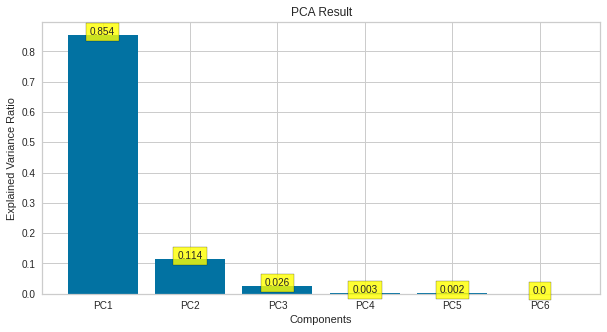

In [162]:
value_x = [0.854,0.114,0.026,0.003,0.002,0.0]
label_x = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6']
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'yellow', alpha =.8))
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = label_x
    y = value_x
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("PCA Result")
      
    # giving X and Y labels
    plt.xlabel("Components")
    plt.ylabel("Explained Variance Ratio")
      
    # visualizing the plot
    plt.show()

In [163]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_scaled)
X_principal = pd.DataFrame(X_principal)

X_principal.columns = ['PC1', 'PC2']
X_principal = X_principal.assign(provinsi=label)
X_principal = X_principal.set_index('provinsi')
X_principal

,PC1,PC2
provinsi,,
ACEH,1.220326,1.523012
SUMATERA UTARA,0.513210,0.453618
SUMATERA BARAT,0.084729,0.846999
RIAU,-0.243611,0.119091
JAMBI,0.290310,-0.349626
SUMATERA SELATAN,0.777364,-0.575104
BENGKULU,0.165203,0.635058
LAMPUNG,1.416734,-0.633550
KEP. BANGKA BELITUNG,-0.014563,-1.554282


# Hierarchical Clustering

## Silhouette Coefficient Visualization

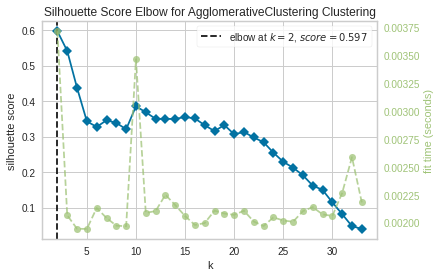

In [164]:
model1 = AgglomerativeClustering(linkage='average')
visualizer = KElbowVisualizer(model1, k=(2,34), metric='silhouette')
visualizer.fit(X_principal)
visualizer.show()

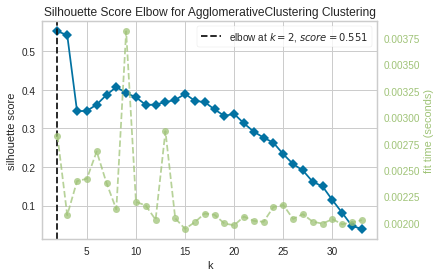

In [165]:
model2 = AgglomerativeClustering(linkage='ward')
visualizer = KElbowVisualizer(model2, k=(2,34), metric='silhouette')
visualizer.fit(X_principal)
visualizer.show()

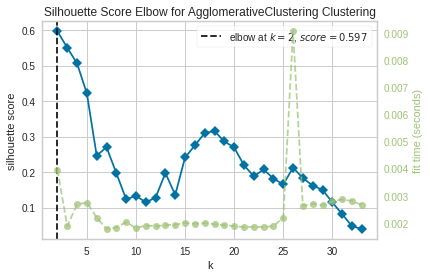

In [166]:
model3 = AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(model3, k=(2,34), metric='silhouette')
visualizer.fit(X_principal)
visualizer.show()

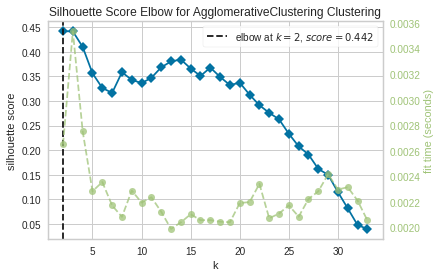

In [167]:
model4 = AgglomerativeClustering(linkage='complete')
visualizer = KElbowVisualizer(model4, k=(2,34), metric='silhouette')
visualizer.fit(X_principal)
visualizer.show()

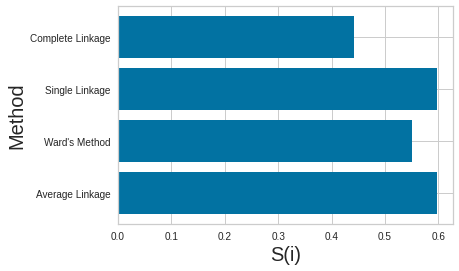

In [168]:

ac1 = AgglomerativeClustering(n_clusters = 2, linkage='average')
ac2 = AgglomerativeClustering(n_clusters = 2, linkage='ward')
ac3 = AgglomerativeClustering(n_clusters = 2, linkage='single')
ac4 = AgglomerativeClustering(n_clusters = 2, linkage='complete')
sh1 = silhouette_score(X_principal, ac1.fit_predict(X_principal))
sh2 = silhouette_score(X_principal, ac2.fit_predict(X_principal))
sh3 = silhouette_score(X_principal, ac3.fit_predict(X_principal))
sh4 = silhouette_score(X_principal, ac4.fit_predict(X_principal))


k = ['Average Linkage', "Ward's Method",'Single Linkage','Complete Linkage']
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(sh1)
silhouette_scores.append(sh2)
silhouette_scores.append(sh3)
silhouette_scores.append(sh4)
  
# Plotting a bar graph to compare the results
plt.barh(k, silhouette_scores)
plt.ylabel('Method', fontsize = 20)
plt.xlabel('S(i)', fontsize = 20)
plt.show()

In [169]:
method = ['Average Linkage', "Ward's Method",'Single Linkage','Complete Linkage']
score_method = pd.DataFrame(method, columns=['Metode'])
score_method['silhouette_score'] = [sh1,sh2,sh3,sh4]

score_method = score_method.sort_values(by=['silhouette_score'], ascending=False)

score_method

,Metode,silhouette_score
0,Average Linkage,0.596633
2,Single Linkage,0.596633
1,Ward's Method,0.551145
3,Complete Linkage,0.441906


## Dendrogram

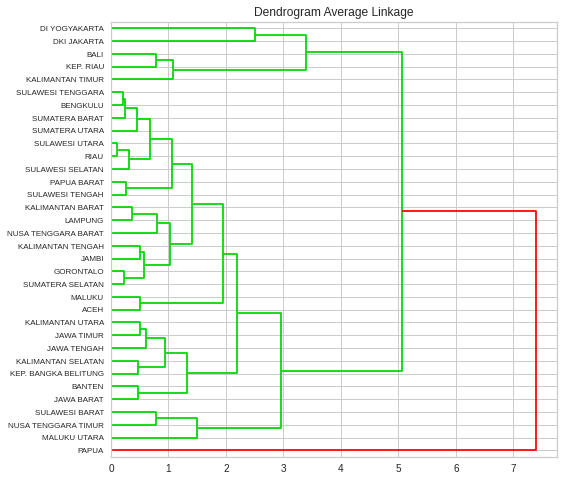

In [170]:
plt.figure(figsize =(8, 8))
plt.title('Dendrogram Average Linkage')
shc.set_link_color_palette(['#00d600'])
Dendrogram1 = shc.dendrogram((shc.linkage(X_principal, method ='average')), labels=label, orientation='right',above_threshold_color='#FF0000')

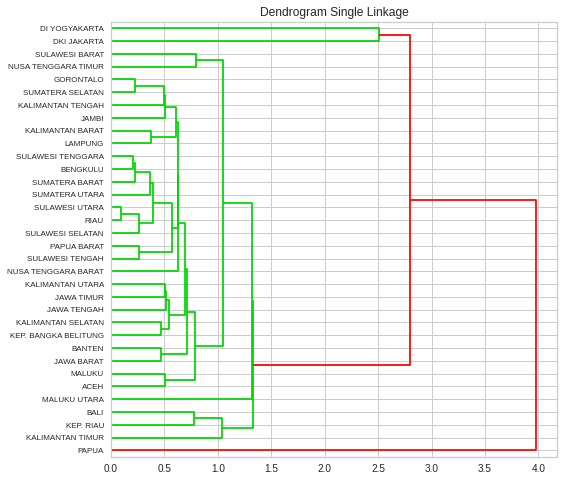

In [171]:
plt.figure(figsize =(8, 8))
plt.title('Dendrogram Single Linkage')
shc.set_link_color_palette(['#00d600'])
Dendrogram1 = shc.dendrogram((shc.linkage(X_principal, method ='single')), labels=label, orientation='right',above_threshold_color='#FF0000')

## Result

In [172]:
cluster = ac1.fit_predict(X_principal)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [173]:
X['cluster'] = cluster + 1
X

,Provinsi,X1,X2,X3,X4,X5,X6,cluster
0,ACEH,5.39,3.53,6.71,5.54,4.25,6.76,1
1,SUMATERA UTARA,5.66,4.19,6.24,5.72,4.72,6.31,1
2,SUMATERA BARAT,5.82,4.10,6.41,5.98,4.57,6.50,1
3,RIAU,5.81,4.44,6.15,5.99,5.23,6.24,1
4,JAMBI,5.74,4.29,5.80,5.86,4.93,5.89,1
5,SUMATERA SELATAN,5.66,3.83,5.55,5.82,4.62,5.63,1
6,BENGKULU,5.75,4.12,6.29,5.99,4.58,6.37,1
7,LAMPUNG,5.32,4.00,5.52,5.55,4.52,5.61,1
8,KEP. BANGKA BELITUNG,5.89,4.64,5.19,5.97,5.25,5.28,1
9,KEP. RIAU,6.97,5.88,6.08,6.90,6.16,6.17,1


In [174]:
klaster = X.groupby(["cluster"]).mean()
round(klaster,2)

,X1,X2,X3,X4,X5,X6
cluster,,,,,,
1,5.89,4.46,6.05,6.04,4.97,6.13
2,3.65,2.17,4.79,3.68,2.23,4.91
